In [1]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
SCRIPTS_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data'
print(DATA_HOME_DIR)

/home/nathan/olin/spring2017/line-follower/line-follower/src/old_lane_follower_past_project/data


In [2]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd

from keras.models import Sequential # 1 neural network pls = 1 model
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import text, image

from sklearn.cross_validation import train_test_split

from scipy import ndimage, misc

Using TensorFlow backend.
/home/nathan/anaconda3/envs/deepLearning/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Set path to sample/ path if desired
path = DATA_HOME_DIR
train_path=path + '/train/binary/'
valid_path=path + '/valid/binary/'

## Import a sample image

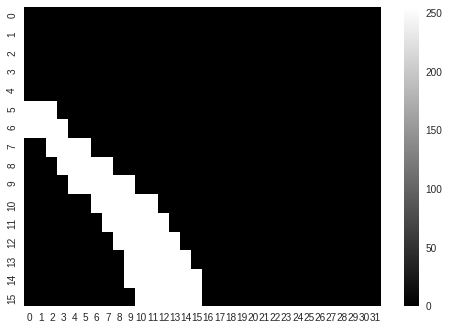

In [5]:
sample_image_path = train_path+'left/'
sample_image_path = sample_image_path + os.listdir(sample_image_path)[0]
sample_image = misc.imread(sample_image_path)

sns.heatmap(sample_image, cmap='gray')

In [6]:
image_shape = sample_image.shape
if len(image_shape) == 2:
    image_shape = image_shape + (1,)
print(image_shape)

(16, 32, 1)


## Constants

In [7]:
batch_size=32

## Import data

In [140]:
classes = ['left', 'forward', 'right']

gen = image.ImageDataGenerator(rescale=1. / 255)
train_gen = gen.flow_from_directory(train_path, target_size=image_shape[:2],
                color_mode='grayscale',class_mode='sparse', batch_size=batch_size, classes=classes)

validation_gen = gen.flow_from_directory(valid_path, target_size=image_shape[:2],
                color_mode='grayscale',class_mode='sparse', batch_size=batch_size, classes=classes)

Found 938 images belonging to 3 classes.
Found 536 images belonging to 3 classes.



# Make a model

In [141]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, 3, 3, input_shape=image_shape, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))

# Dense layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(3))
model.add(Dense(1))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_25 (Convolution2D) (None, 16, 32, 16)    160         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 8, 16, 16)     0           convolution2d_25[0][0]           
____________________________________________________________________________________________________
convolution2d_26 (Convolution2D) (None, 8, 16, 32)     12832       maxpooling2d_17[0][0]            
____________________________________________________________________________________________________
maxpooling2d_18 (MaxPooling2D)   (None, 4, 8, 32)      0           convolution2d_26[0][0]           
___________________________________________________________________________________________

## Compile model

In [142]:
model.compile(optimizer='adam', loss='mean_absolute_error')

## Train model

In [143]:
model.fit_generator(train_gen, 
                    samples_per_epoch=train_gen.nb_sample, nb_epoch=8, 
                    validation_data=validation_gen, nb_val_samples=validation_gen.nb_sample)

Epoch 1/8
938/938 [==============================] - 0s - loss: 0.3666 - val_loss: 0.2280
Epoch 2/8
938/938 [==============================] - 0s - loss: 0.2314 - val_loss: 0.2329
Epoch 3/8
938/938 [==============================] - 0s - loss: 0.2301 - val_loss: 0.1753
Epoch 4/8
938/938 [==============================] - 0s - loss: 0.2105 - val_loss: 0.1797
Epoch 5/8
938/938 [==============================] - 0s - loss: 0.2079 - val_loss: 0.1934
Epoch 6/8
938/938 [==============================] - 0s - loss: 0.1819 - val_loss: 0.1865
Epoch 7/8
938/938 [==============================] - 0s - loss: 0.1734 - val_loss: 0.1501
Epoch 8/8
938/938 [==============================] - 0s - loss: 0.1794 - val_loss: 0.1731


[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 0 1 2 1]
2
[ 2.05428505]


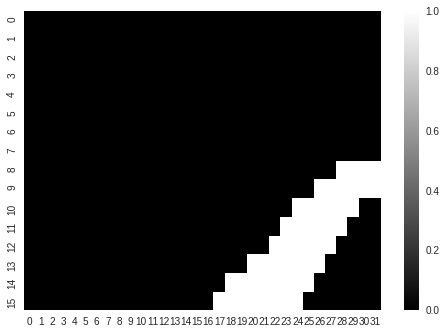

In [162]:
pic, data = next(validation_gen)
print(data)
sns.heatmap(pic[0].reshape(16,32), cmap='gray')
print(data[0])
print(model.predict(pic)[0])